# this model will recognize whether cotton plant and cotton leaf is fresh or Diseased

In [13]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [23]:
train_data_path="./cotton-disease/train"
validation_data_path="./cotton-disease/val"

In [24]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [25]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
print(training_datagen)

In [26]:
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary') 

Found 1951 images belonging to 4 classes.


In [27]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [28]:
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


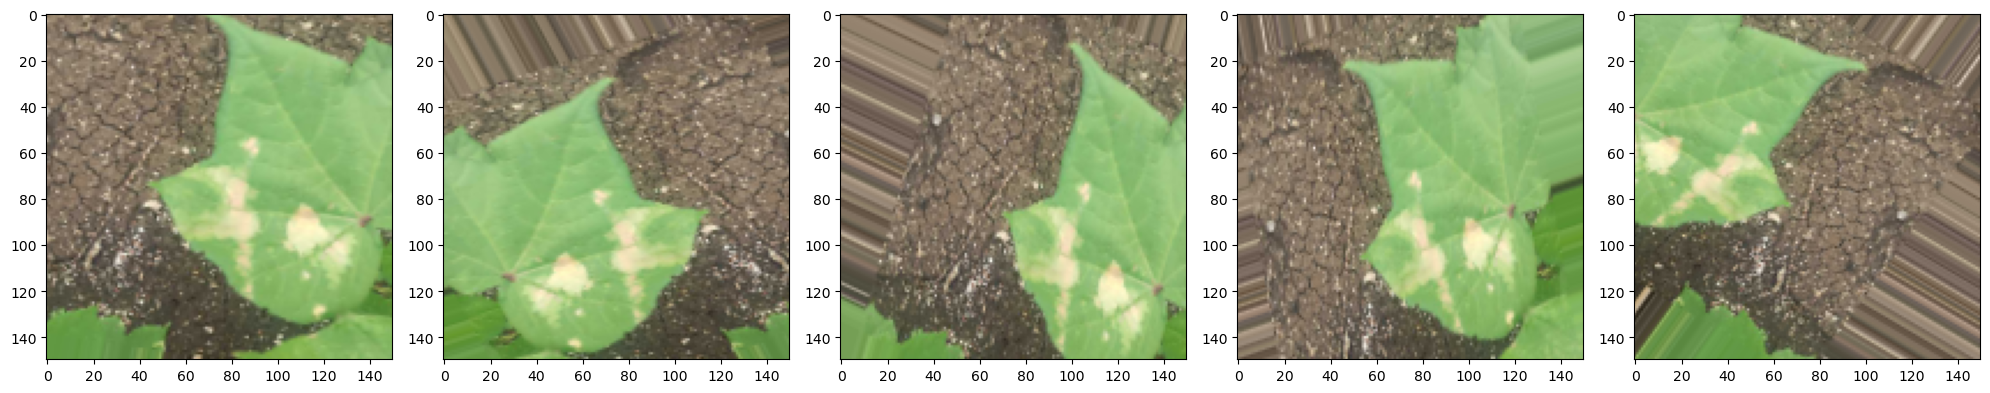

In [30]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [31]:
model_path = './cotton-disease/v3_red_cott_dis.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [32]:
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])
cnn_model.compile(optimizer = Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
cnn_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [34]:
history = cnn_model.fit(training_data, 
                          epochs=70, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/70
61/61 [==============================] - ETA: 0s - loss: 1.2038 - accuracy: 0.4644
Epoch 1: val_accuracy improved from -inf to 0.46296, saving model to ./cotton-disease\v3_red_cott_dis.h5
61/61 [==============================] - 148s 2s/step - loss: 1.2038 - accuracy: 0.4644 - val_loss: 1.0624 - val_accuracy: 0.4630
Epoch 2/70
61/61 [==============================] - ETA: 0s - loss: 1.0244 - accuracy: 0.5659
Epoch 2: val_accuracy improved from 0.46296 to 0.59568, saving model to ./cotton-disease\v3_red_cott_dis.h5
61/61 [==============================] - 116s 2s/step - loss: 1.0244 - accuracy: 0.5659 - val_loss: 0.9400 - val_accuracy: 0.5957
Epoch 3/70
61/61 [==============================] - ETA: 0s - loss: 0.9368 - accuracy: 0.5987
Epoch 3: val_accuracy improved from 0.59568 to 0.61111, saving model to ./cotton-disease\v3_red_cott_dis.h5
61/61 [==============================] - 116s 2s/step - loss: 0.9368 - accuracy: 0.5987 - val_loss: 0.9500 - val_accuracy: 0.6111
Epoch 4

Epoch 29/70
61/61 [==============================] - ETA: 0s - loss: 0.3908 - accuracy: 0.8626
Epoch 29: val_accuracy did not improve from 0.90123
61/61 [==============================] - 117s 2s/step - loss: 0.3908 - accuracy: 0.8626 - val_loss: 0.5375 - val_accuracy: 0.7593
Epoch 30/70
61/61 [==============================] - ETA: 0s - loss: 0.4336 - accuracy: 0.8288
Epoch 30: val_accuracy did not improve from 0.90123
61/61 [==============================] - 116s 2s/step - loss: 0.4336 - accuracy: 0.8288 - val_loss: 0.2822 - val_accuracy: 0.8858
Epoch 31/70
61/61 [==============================] - ETA: 0s - loss: 0.4030 - accuracy: 0.8488
Epoch 31: val_accuracy did not improve from 0.90123
61/61 [==============================] - 117s 2s/step - loss: 0.4030 - accuracy: 0.8488 - val_loss: 0.3460 - val_accuracy: 0.8426
Epoch 32/70
61/61 [==============================] - ETA: 0s - loss: 0.3874 - accuracy: 0.8570
Epoch 32: val_accuracy did not improve from 0.90123
61/61 [===============

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
history.history

NameError: name 'plt' is not defined

In [53]:
# plotImages(training_data[0][0])
training_data[0][0].shape

(32, 150, 150, 3)

In [15]:
test_data_path="./cotton-disease/test"
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(test_data_path,
                                  target_size=(150,150),
                                  batch_size=5,
                                  class_mode='binary')

Found 36 images belonging to 5 classes.


In [10]:
import tensorflow as tf
model_load=tf.keras.models.load_model(r'.\cotton-disease\v3_red_cott_dis.h5')


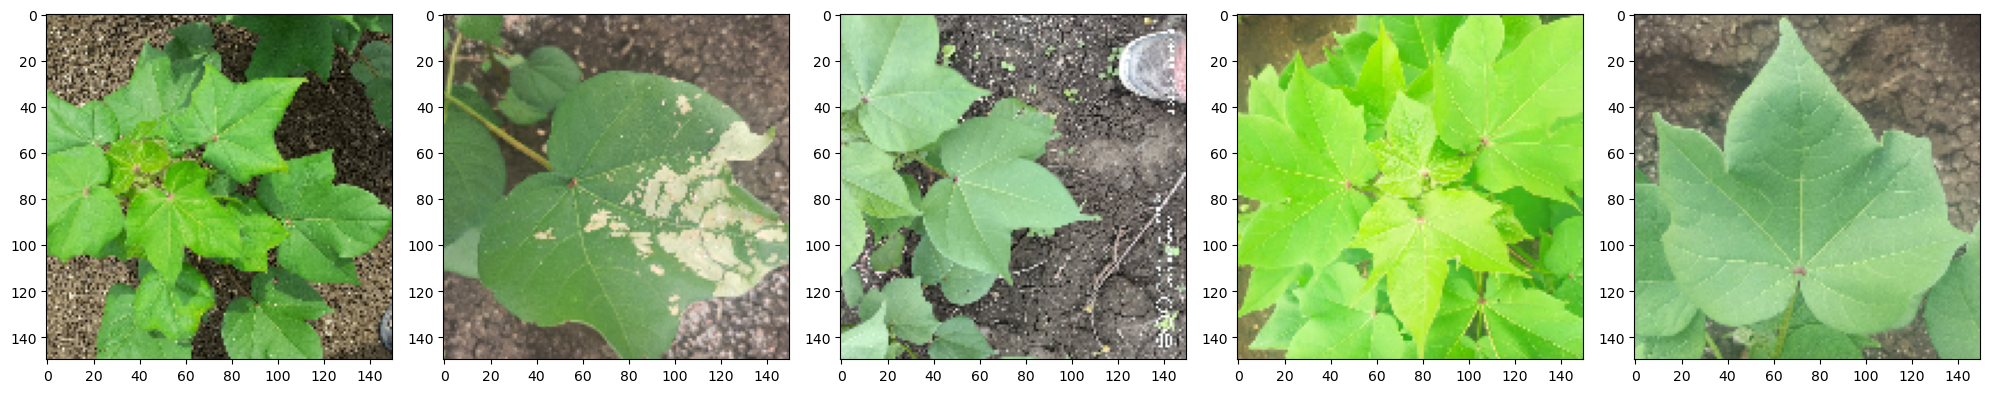

In [31]:
plotImages(test_data[0][0])

In [32]:
result=model_load.predict(test_data[1][0])


1/1 [==============================] - 0s 57ms/step


In [35]:
import numpy as np
result
result=np.argmax(result)

print(result)
Name=list(training_data.class_indices)[int(result)]
print(Name)
# plotImages(test_data[0][0])

0
diseased cotton leaf


In [38]:
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow.keras.preprocessing import image

def custom(test_image):
    
#     test_image=r'./cotton-disease/test/fresh cotton leaf/d (341).jpg'
    open_image=Image.open(test_image)
    test_image=image.load_img(test_image,target_size=(150,150))
    test_image=image.img_to_array(test_image)
    test_image=test_image/255
    # print(test_image.shape)

    test_image=np.expand_dims(test_image,axis=0)

    # print(test_image.shape)

    result=model_load.predict(test_image)
    # print("Prob ",result)

    result=np.argmax(result)
    print(result)

    Name=list(training_data.class_indices)[int(result)]
    print(Name)

    plt.imshow(open_image)
    plt.title(Name)
    plt.show()

1/1 [==============================] - 0s 36ms/step
2
fresh cotton leaf


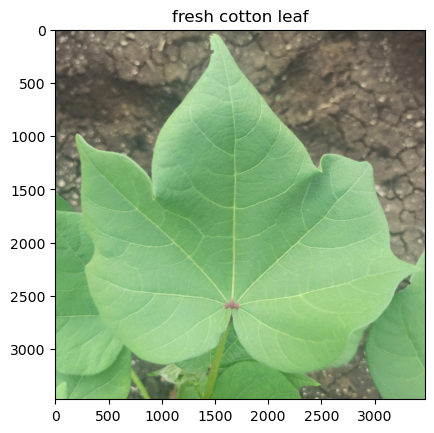

In [39]:
custom(r'./cotton-disease/test/fresh cotton leaf/d (341).jpg')

1/1 [==============================] - 0s 30ms/step
1
diseased cotton plant


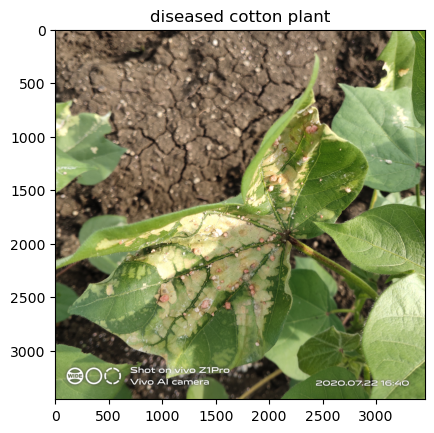

In [40]:
custom(r'./cotton-disease/test/diseased cotton leaf/dis_leaf (322).jpg')

1/1 [==============================] - 0s 31ms/step
0
diseased cotton leaf


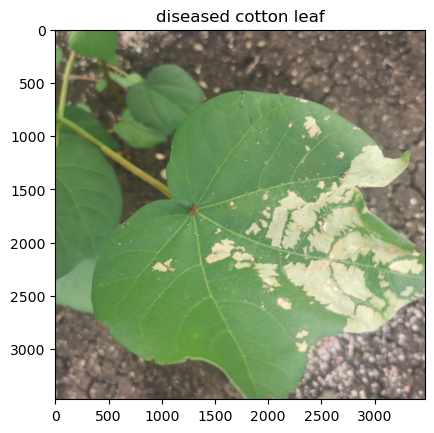

In [115]:

custom(r'./cotton-disease/test/diseased cotton leaf/dis_leaf (124).jpg')

1/1 [==============================] - 0s 32ms/step
1
diseased cotton plant


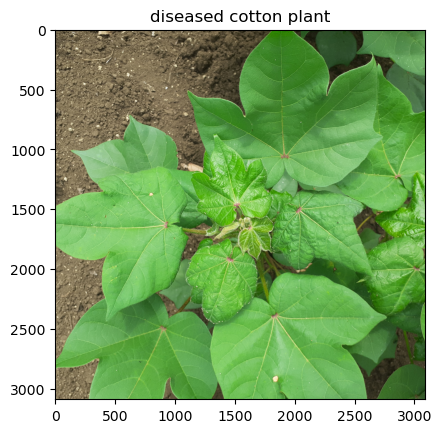

In [41]:

custom(r'./cotton-disease/test/diseased cotton plant/dd (513).jpg')

1/1 [==============================] - 0s 47ms/step
2
fresh cotton leaf


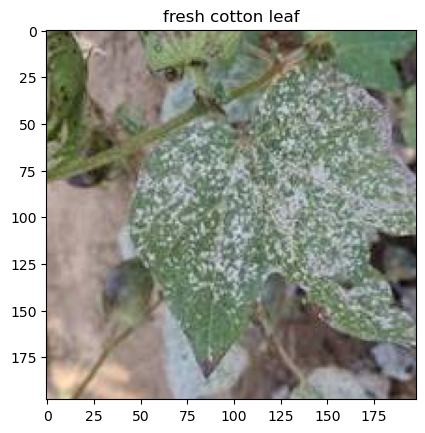

In [42]:

custom(r'./cotton_dl.jpg')

1/1 [==============================] - 0s 30ms/step
1
diseased cotton plant


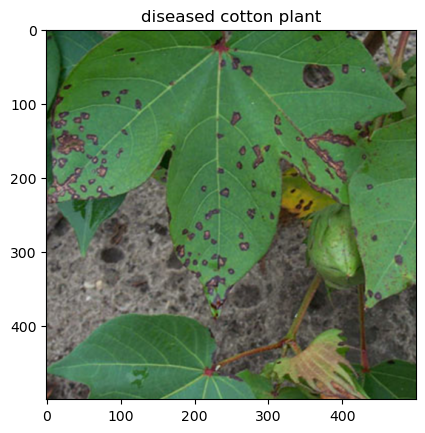

In [45]:

custom(r'./cotton-dl2.png')

1/1 [==============================] - 0s 32ms/step
1
diseased cotton plant


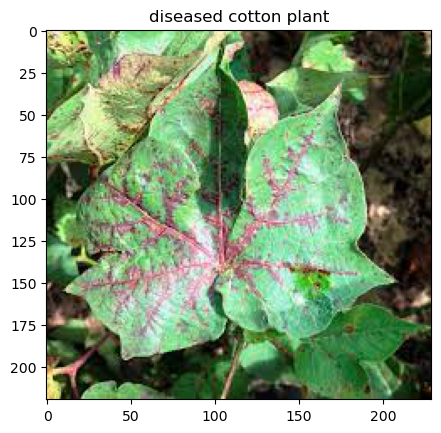

In [46]:

custom(r'./cotton-dl4.jpg')

1/1 [==============================] - 0s 37ms/step
3
fresh cotton plant


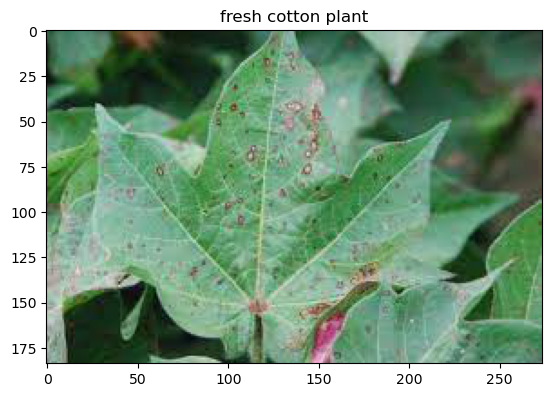

In [48]:

custom(r'./cotton-dl5.jpg')

1/1 [==============================] - 0s 36ms/step
0
diseased cotton leaf


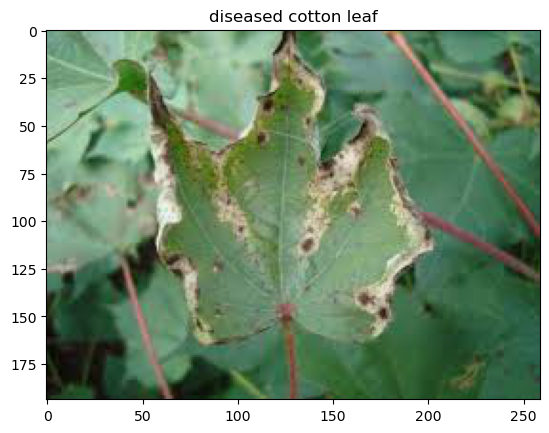

In [49]:

custom(r'./cotton-dl6.jpg')

1/1 [==============================] - 0s 39ms/step
0
diseased cotton leaf


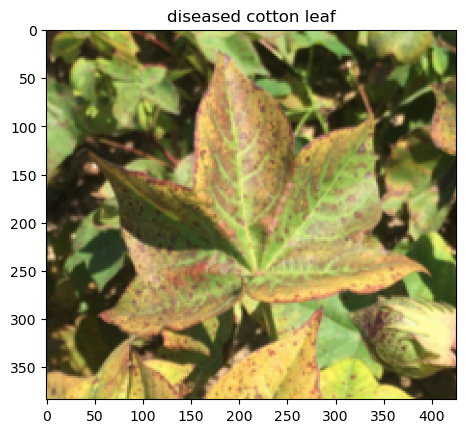

In [51]:

custom(r'./cotton-dl7.png')

1/1 [==============================] - 0s 39ms/step
0
diseased cotton leaf


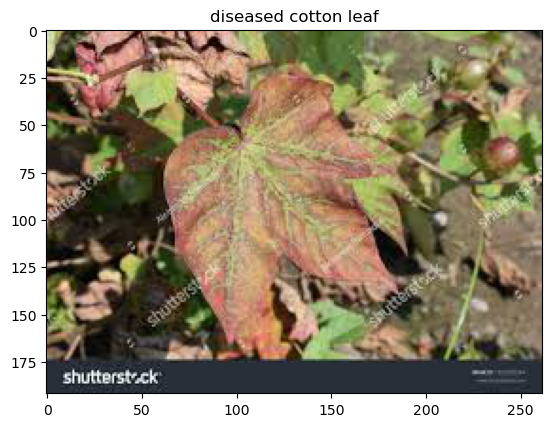

In [52]:

custom(r'./cotton-dl8.jpg')

1/1 [==============================] - 0s 42ms/step
0
diseased cotton leaf


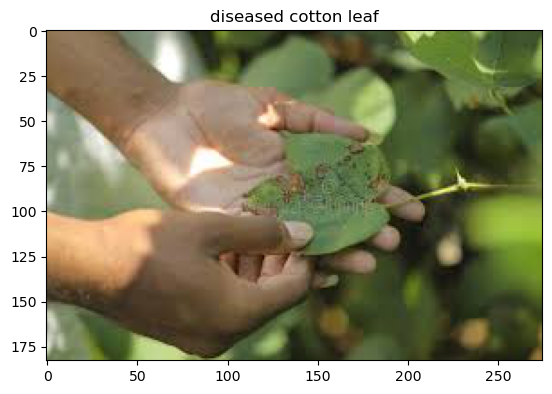

In [53]:

custom(r'./cotton-dl9.jpg')